Индивидуальный проект: **Прогноз продаж видеоигр**

Автор: **Частухин Даниил 0392**

Ссылка на датасет: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

## 1. Цель и задачи исследования

Видеоигры стали не только развлечением, но и большим бизнесом. Издателям и разработчикам очень важно знать примерное число продаж игры, чтобы правильно рассчитать расходы на разработку и маркетинг и при этом постараться не уйти в минус. В данном проекте я постараюсь спрогнозировать продажи игр на основе различных параметров, преимущественно на её рейтинге.

## 2. Описание набора данных

Данные взяты с сайта: [kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

### Описание данных

Датасет представлен в виде одного единственного файла 'Video_Games.csv'

- Выборка включает 16719  записей и 16 признаков (строки и столбцы соответственно).
- Целевая переменная **Global_Sales** — мировые продажи игры
- Есть дополнительные целевые переменные по регионам: **NA_Sales**,	**EU_Sales**, **JP_Sales**, **Other_Sales**

- Количественные переменные:
    - **Global_Sales** — мировые продажи;
    - **NA_Sales** — продажи в Северной Америке;
    - **EU_Sales** — продажи в Европе;
    - **JP_Sales** — продажи в Японии;
    - **Other_Sales** — продажи в остальных регионах;
    - **Critic_Score** — рейтинг критиков на Metacritic;
    - **Critic_Count** — число критиков, которые оценили игру на Metacritic;
    - **User_Score** — рейтинг пользователей на Metacritic;
    - **User_Count** — число пользователей, которые оценили игру на Metacritic;
    
- Порядковые переменные:
    - **Year_of_Release** — год выпуска;
    
- Категориальные переменные:
    - **Platform** — игровая платформа;
    - **Genre** — жанр;
    - **Rating** — возрастной рейтинг игры;
    
- Текстовые переменные
    - **Name** — название игры;
    - **Publisher** — издатель;
    - **Developer** — разработчик;

## 3. Разведочный анализ данных

In [1459]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from collections import Counter

In [1460]:
df = pd.read_csv('Video_Games.csv')

### Основная информация

In [1461]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2868,Crysis,PC,2007.0,Shooter,Electronic Arts,0.00,0.69,0.00,0.02,0.71,91.0,56.0,8,1970.0,Crytek,M
1286,Major League Baseball 2K5,PS2,2005.0,Sports,Take-Two Interactive,0.72,0.56,0.00,0.19,1.48,82.0,19.0,7.4,20.0,Kush Games,E
10311,Ranma 1/2: Akanekodan Teki Hihou,SNES,1993.0,Role-Playing,TOHO,0.00,0.00,0.11,0.00,0.11,NaN,NaN,NaN,NaN,NaN,NaN
4468,Primal,PS2,2003.0,Action,Sony Computer Entertainment,0.21,0.17,0.00,0.06,0.43,73.0,36.0,8.6,53.0,SCEE,M
285,Super Mario World 2: Yoshi's Island,SNES,1995.0,Platform,Nintendo,1.65,0.61,1.76,0.09,4.12,NaN,NaN,NaN,NaN,NaN,NaN


In [1462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Есть много нулевых ячеек в различных столбцах, с этим придётся потом поработать

In [1463]:
df.shape

(16719, 16)

In [1464]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

### Визуализация

Построим гистограммы

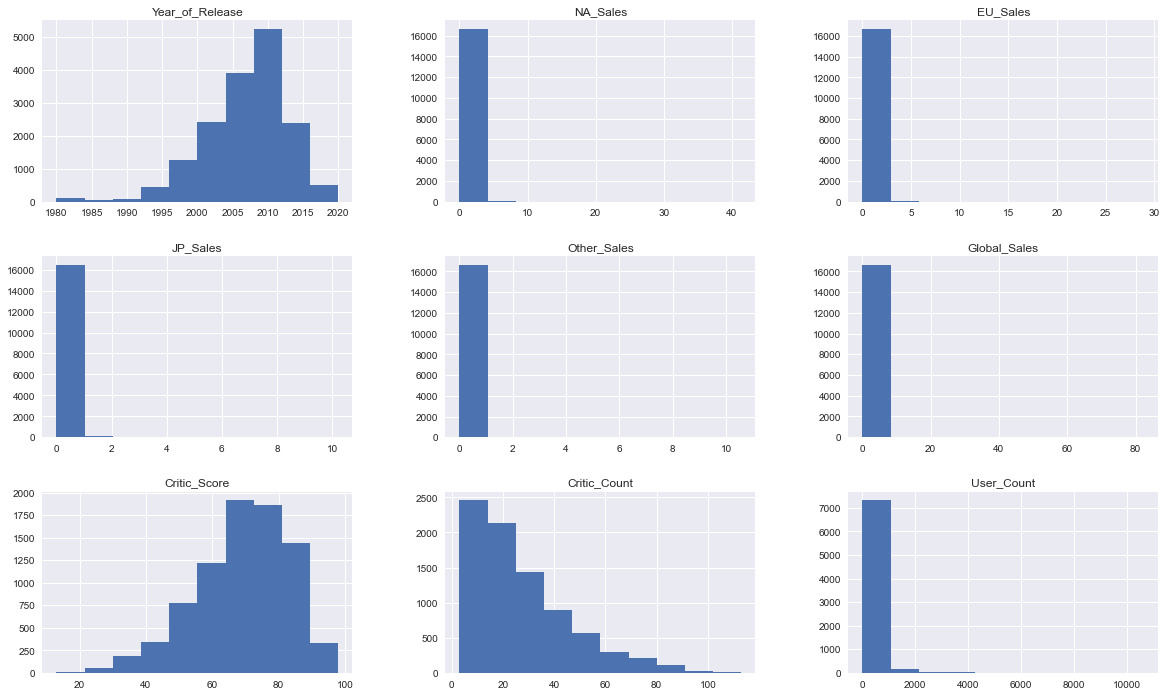

In [1465]:
df.hist(figsize=(20, 12))
None

Карту корреляции

<AxesSubplot:>

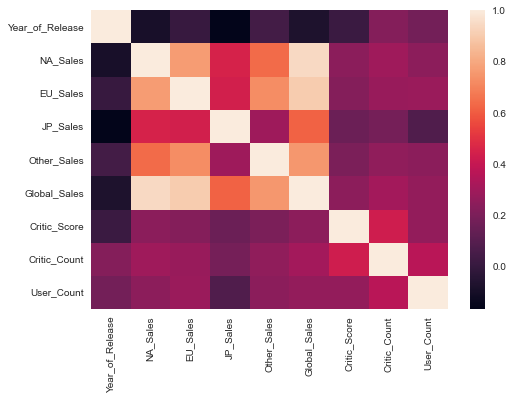

In [1466]:
sns.heatmap(df.corr())

Сильно коррелируют между собой только Global_Sales с NA_Sales/EU_Sales, но оно и понятно, так как на эти регионы приходится основное число продаж игр (около 60%)

###  Различные интересные графики и диаграммы

In [1467]:
platform = Counter(df['Platform'].tolist()).most_common(20)
x = [x[0] for x in platform]
y = [x[1] for x in platform]

fig = go.Bar(x = x,
             y = y,
             marker = dict(color = 'rgba(100, 65, 164, 0.85)',
                         line=dict(color='rgb(25, 20, 20)',width=1.25)))

layout = go.Layout()

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Игровые платформы с самым большим числом игр')

fig.show()

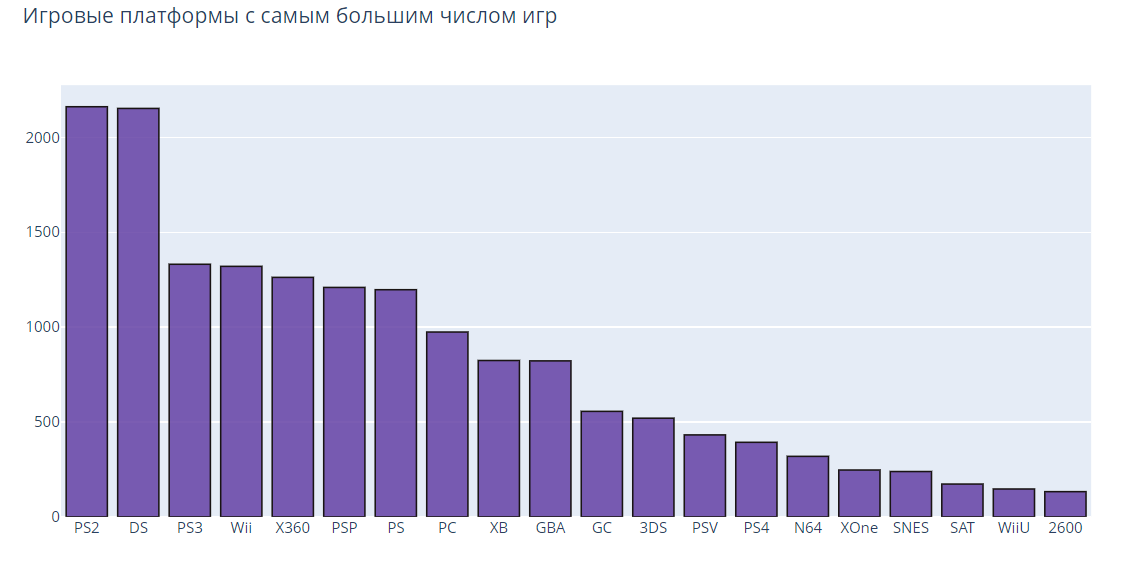

In [1468]:
platform = Counter(df['Publisher'].tolist()).most_common(20)
x = [x[0] for x in platform]
y = [x[1] for x in platform]

fig = go.Bar(x = x,
             y = y,
             marker = dict(color = 'rgba(255, 227, 71, 0.85)',
                         line=dict(color='rgb(25, 20, 20)',width=1.25)))

layout = go.Layout()

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Издатели, выпустившие большее число игр')

fig.show()

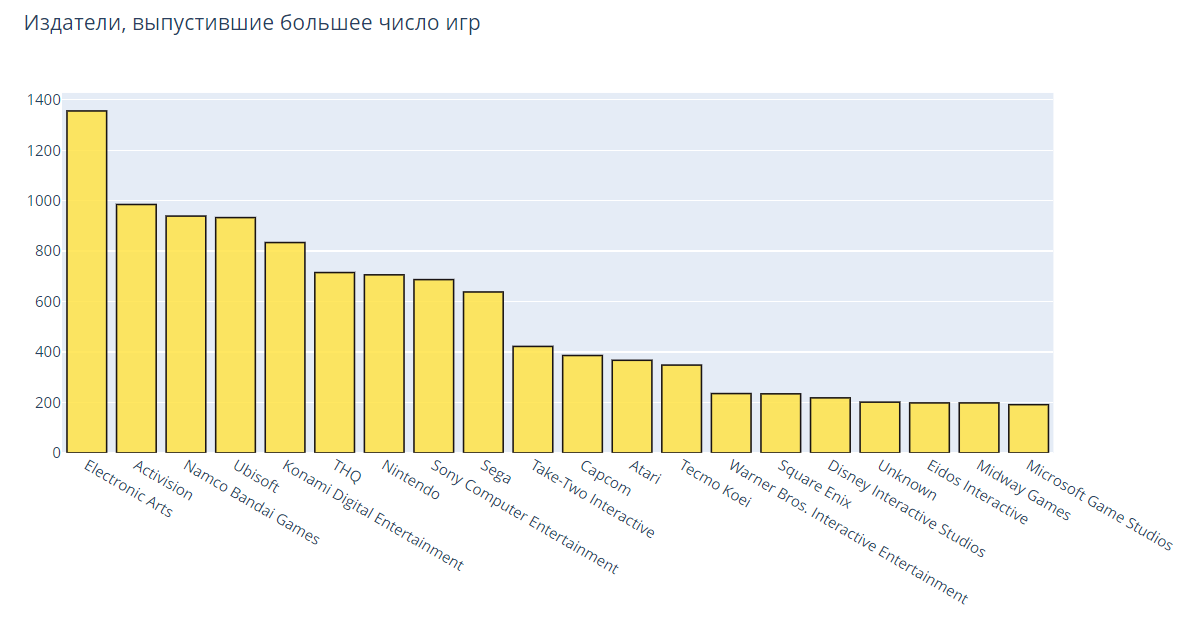

In [1469]:
platform = Counter(df['Genre'].tolist()).most_common(30)
x = [x[0] for x in platform]
y = [x[1] for x in platform]

fig = go.Bar(x = x,
             y = y,
             marker = dict(color = 'rgba(194, 24, 7, 0.85)',
                         line=dict(color='rgb(25, 20, 20)',width=1.25)))

layout = go.Layout()

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Самые частые игровые жанры')

fig.show()

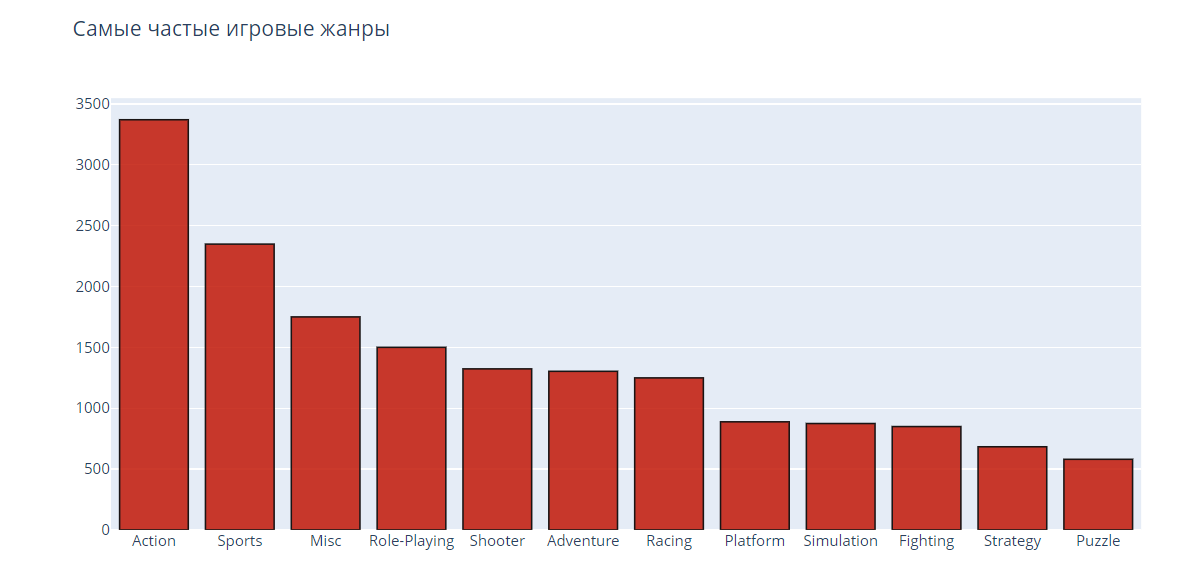

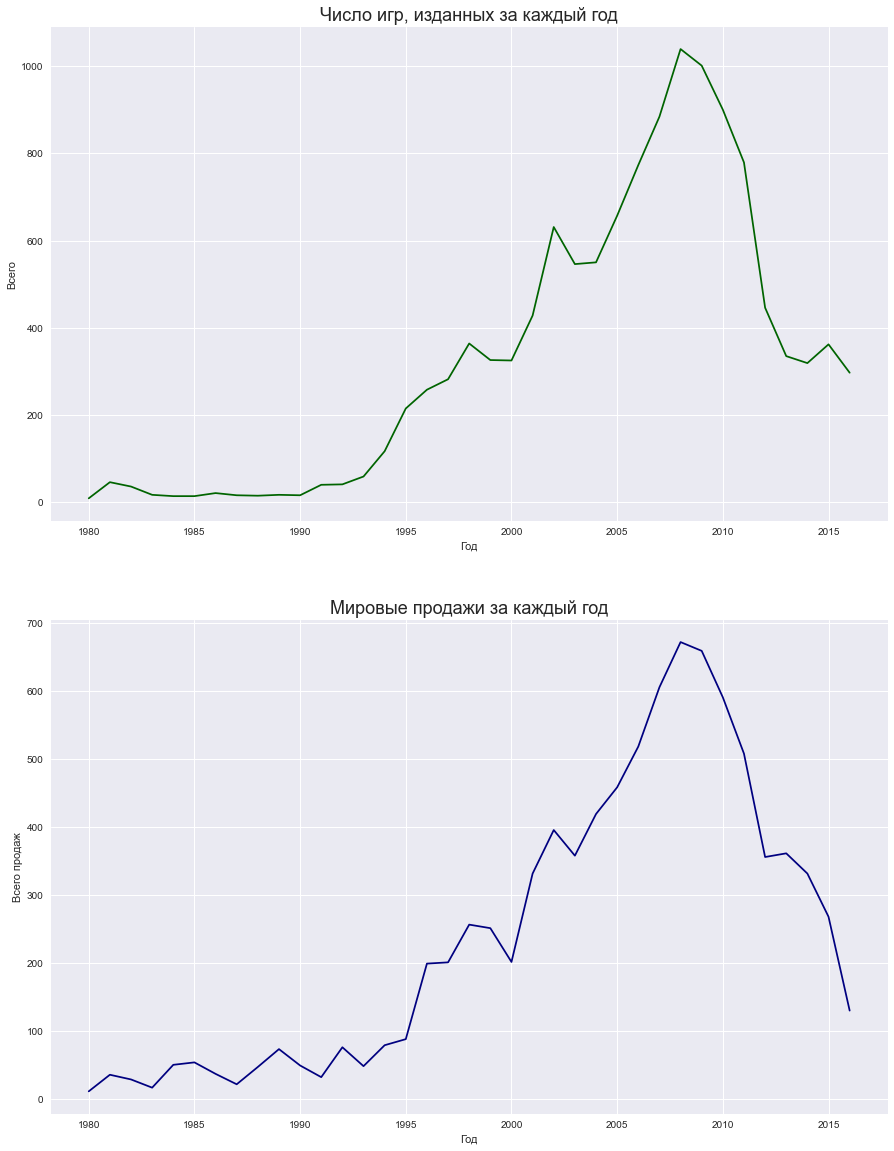

In [1470]:
plt.style.use('seaborn')
fig, ax =plt.subplots(2, 1, figsize=(15,20)) 

data = df[['Year_of_Release', 'Name']].loc[df['Year_of_Release'] < 2017].groupby('Year_of_Release').nunique()
sns.lineplot(data = data, x = 'Year_of_Release', y = 'Name', ax=ax[0], ci=None, color="darkgreen")
ax[0].set_xlabel('Год');
ax[0].set_ylabel('Всего');
ax[0].set_title('Число игр, изданных за каждый год', fontsize=18)

data = df[['Year_of_Release', 'Global_Sales']].loc[df['Year_of_Release'] < 2017].groupby('Year_of_Release').sum()
sns.lineplot(data=data, x = 'Year_of_Release', y = 'Global_Sales', ci=None, ax=ax[1], color="navy")
ax[1].set_xlabel('Год');
ax[1].set_ylabel('Всего продаж');
ax[1].set_title('Мировые продажи за каждый год', fontsize=18)
plt.show()

Последние два графика очень интересные, по ним видно, что максимальное число выпускаемых игр за год достигается в районе 2010-ых годов, а вместе с этим и растёт общее число продаж. А после 2010-ых общее число выпускаемых игр пошло на спад, я считаю, что это связано с удорожанием стоимости производства игр, а также с увеличением времени разработки. Падение продаж после 2010-ых годов можно связать с подорожанием игр, а также неполным подсчётом, так как непонятно, считаются только проданные физические копии (тогда очень логично их падение после 10-ых годов, так как растёт популярность покупок в цифре) или физические и цифровые копии вместе (тогда малые продажи можно связать ранним сроком, датасет был создан в 2016 году, а значит игры 2014-2016 годов ещё не успели особо напродаваться)

## 4. Заполняем пропуски, исключаем аномалии

Посмотрим, сколько игр представлено за каждый год

In [1471]:
df['Year_of_Release'].value_counts(dropna=False).sort_index(ascending=True)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
NaN        269
Name: Year_of_Release, dtype: int64

Видно, что запись игр шла до 2016 года, игры за 2017 и 2020 попали случайно

Удалим их вместе с играми без года выпуска

In [1472]:
df = df[df['Year_of_Release'] < 2017]
df = df[df['Year_of_Release'].notna()]
df['Year_of_Release'] = df['Year_of_Release'].apply(int)

### Работаем с пропусками

Посмотрим, сколько ещё раз nan для каждого столбца

In [1473]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         6607
User_Count         8983
Developer          6540
Rating             6678
dtype: int64

Для значений Name и Genre есть только по 2 пустых значения, посмотрим на них

In [1474]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [1475]:
df[df['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


Пустые значения в столбах совпадают. Это игры от одного издателя Acclaim Entertainment.

In [1476]:
df[df['Publisher'] == 'Acclaim Entertainment']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
399,WWF War Zone,PS,1998,Fighting,Acclaim Entertainment,2.47,0.76,0.00,0.13,3.36,NaN,NaN,NaN,NaN,NaN,NaN
610,Crazy Taxi,PS2,2001,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52,80.0,15.0,7.9,46.0,Acclaim Studios Cheltenham,T
659,NaN,GEN,1993,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
933,Turok 2: Seeds of Evil,N64,1997,Platform,Acclaim Entertainment,1.37,0.41,0.04,0.04,1.86,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,XGRA: Extreme G Racing Association,GC,2003,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,69.0,13.0,7,5.0,Acclaim Studios Cheltenham,T
15487,XGRA: Extreme G Racing Association,XB,2003,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,66.0,15.0,6.8,5.0,Acclaim Studios Cheltenham,T
15553,Mortal Kombat,PC,1994,Fighting,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
15581,Speed Kings,GC,2003,Racing,Acclaim Entertainment,0.01,0.00,0.00,0.00,0.02,59.0,9.0,tbd,NaN,Climax Group,E


In [1477]:
df[(df['Publisher'] == 'Acclaim Entertainment') & (df['Year_of_Release'] == 1993)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


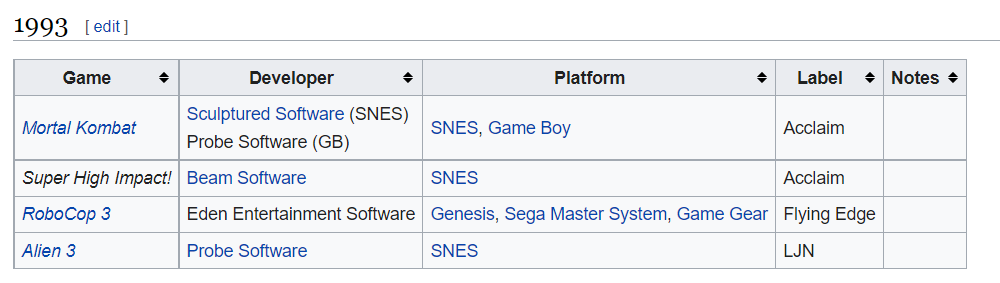

In [1478]:
df.loc[[659], ('Name', 'Genre')] = ('RoboCop 3', 'Platform')
df.loc[[14246], ('Name', 'Genre')] = ('Alen 3', 'Shooter')

С 32 пропусками в издателях и уж тем более 6540 пропуска разработчика я построчно заполнять не буду

Заменим все эти пустые значения на "Unknown"

In [1479]:
df.fillna({'Publisher':'Unknown', 'Developer':'Unknown'}, inplace=True)

Теперь поработаем с возрастным рейтингом (столбец "Rating")

In [1480]:
df['Rating'].value_counts(dropna=False)

NaN     6678
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: Rating, dtype: int64

Видно, что у около 40% игр отсутсвует рейтинг, так же есть отдельные подрейтинги, которые содержат лишь пару игр

Разберёмся сначала со вторым

Значение RP - "Rating Pending" переводится как "рейтинг ожидается"

In [1481]:
df[df['Rating'] == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP


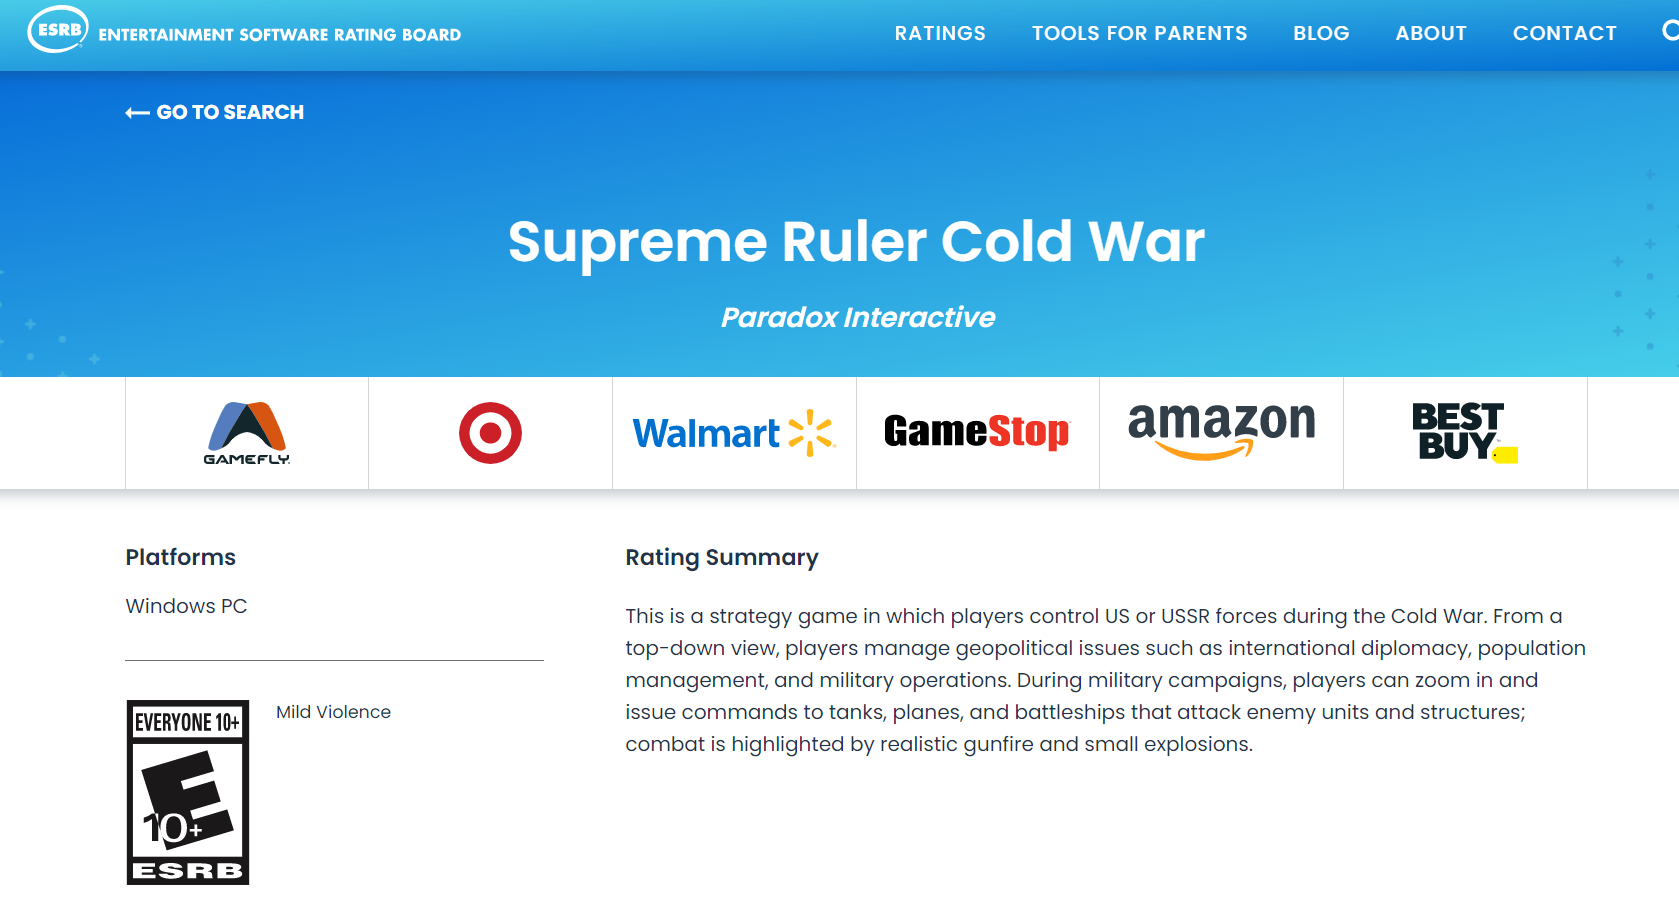

Объединим рейтинги 'E' (Everyone),'E10+' (Everyone10+), 'EC' (Early Child) и 'K-A' (Kids to Adults) в один рейтинг 'E'

А в одной игре рейтинг 'AO' (Adults Only) заменим на 'M' (Mature)

In [1482]:
df.loc[df['Rating'].isin(('E10+', 'EC', 'K-A', 'RP')), 'Rating'] = 'E'
df.loc[df['Rating'] == 'AO', 'Rating'] = 'M'

In [1483]:
df['Rating'].value_counts(dropna=False)

NaN    6678
E      5326
T      2905
M      1537
Name: Rating, dtype: int64

Осталось понять, что делать с пустыми значениями

In [1484]:
df[df['Rating'].isna()].sample(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11083,Star Wars: Empire at War - Gold Pack,PC,2007,Strategy,LucasArts,0.01,0.06,0.00,0.01,0.09,NaN,NaN,NaN,NaN,Unknown,NaN
6810,Command & Conquer 3: Kane's Wrath,X360,2008,Strategy,Electronic Arts,0.16,0.06,0.00,0.02,0.24,NaN,NaN,NaN,NaN,Unknown,NaN
2109,Rocksmith 2014,PS3,2013,Misc,Ubisoft,0.53,0.24,0.05,0.16,0.98,NaN,NaN,NaN,NaN,Unknown,NaN
16610,Mystereet,PS2,2006,Adventure,Yeti,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,Unknown,NaN
13491,Rat Attack!,PS,1999,Puzzle,Mindscape,0.03,0.02,0.00,0.00,0.04,NaN,NaN,NaN,NaN,Unknown,NaN
5118,Kotoba no Puzzle: Mojipittan DS,DS,2007,Puzzle,Namco Bandai Games,0.00,0.00,0.37,0.00,0.37,NaN,NaN,NaN,NaN,Unknown,NaN
5491,BattleTanx,N64,1998,Action,3DO,0.26,0.06,0.00,0.00,0.33,NaN,NaN,NaN,NaN,Unknown,NaN
13425,The Berenstain Bears and the Spooky Old Tree,GBA,2005,Platform,Namco Bandai Games,0.03,0.01,0.00,0.00,0.05,NaN,NaN,NaN,NaN,Unknown,NaN
16707,Strawberry Nauts,PSV,2016,Adventure,Unknown,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,Unknown,NaN
15510,Gakuen K: Wonderful School Days,PSP,2014,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,Unknown,NaN


Большинство случайных игр с пропуском рейтинга, которые я посмотрел выше, чаще всего относятся (по информации оф сайта esrb) к рейтингу 'E', реже к 'T', одна игра попалась из рейтинга 'M'

Присвою всем играм без рейтинга рейтинг 'T', чтобы было где-то посередине

In [1485]:
df.fillna({'Rating':'T'}, inplace=True)

Остались лишь пропуски с рейтингом

In [1486]:
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         6607
User_Count         8983
Developer             0
Rating                0
dtype: int64

Узнаем, почему "User_Score" и "User_Count" не совпадают по числу пропусков

In [1487]:
df.loc[df['User_Score'].notna() & df['User_Count'].isna(), 'User_Score'].value_counts()

tbd    2376
Name: User_Score, dtype: int64

tbd - to be determined, т.е. рейтинга нет, это тоже пропуск

In [1488]:
df.loc[df['User_Score'].notna() & df['User_Count'].isna(), 'User_Score'] = np.nan

Посмотрим с какого года начали появляться рецензии на игры

In [1489]:
df[['Year_of_Release', 'Critic_Score']].groupby(['Year_of_Release']).count()

,Critic_Score
Year_of_Release,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,1
1986,0
1987,0
1988,1


Отсюда видно, что рецензии начали появляться только с ~2000-ых годов

Разберусь с пропусками рейтингов в пункте генерации признаков

## 4. Генерация и селекция признаков

Запишем все признаки, которые будем использовать

In [1490]:
from sklearn.preprocessing import StandardScaler

In [1491]:
data = df.copy()
data.reset_index(inplace=True, drop=True)

### Publisher's fame

Разберёмся с параметром "Издатель". Сделаем этот признак категориальным

In [1492]:
publ_games = data[['Name', 'Publisher']].groupby(['Publisher']).nunique()

In [1493]:
publ_games.sort_values(['Name'], ascending=False)

,Name
Publisher,
Namco Bandai Games,781
Nintendo,666
Konami Digital Entertainment,635
Sony Computer Entertainment,626
Electronic Arts,607
...,...
Max Five,1
Masque Publishing,1
Marvelous Games,1


In [1494]:
publ_games.describe()

,Name
count,579.000000
mean,20.378238
std,77.196623
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,781.000000


Создадим новый столбец "Известность" (в данном случае известность издателя), это признак будет использоваться вместо "Издатель"

In [1495]:
data.insert(5, 'Fame', 0)
for i in range(len(data)):
    data.loc[i, 'Fame'] = 1 if publ_games.loc[data.loc[i, 'Publisher'], 'Name'] > publ_games['Name'].mean() else 0

### Rating

Разобраться с остуствующими рейтингами решил просто - убрать те игры, где рейтинги отсуствуют

Потому что вариант с заполнением пропусков на 0 показал более плохой результат

In [1496]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

### Нормализация

In [1497]:
# Числовые признаки
num_cols = [
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count',
    'Year_of_Release',
    'Fame'
]

# Категориальные признаки
cat_cols = [
    'Platform',
    'Genre',
    'Rating',
]

# Строковые признаки
str_cols = [
    'Name',
    'Developer'
]

feature_cols = num_cols + cat_cols
target_col = 'Global_Sales' # Будем пресказывать только мировые продажи

Закодируем категориальные признаки с помощью one-hot encoding

In [1498]:
X = data.copy()
X = pd.get_dummies(X, columns=cat_cols)
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), X.columns))

In [1499]:
X[cat_cols_new].sample(5)

,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_M,Rating_T
4634,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2049,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3286,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1481,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Нормализуем числовые признаки

In [1501]:
pca = StandardScaler()
X = pca.fit_transform(X[num_cols + cat_cols_new])
y = data[target_col]

In [1502]:
X

array([[ 0.41424837,  1.15444802,  0.56652189, ...,  1.13460381,
        -0.51248157, -0.74155922],
       [ 0.8471464 ,  2.30068853,  0.77489846, ...,  1.13460381,
        -0.51248157, -0.74155922],
       [ 0.70284705,  2.30068853,  0.56652189, ...,  1.13460381,
        -0.51248157, -0.74155922],
       ...,
       [-0.66799669, -0.87752379, -0.96157291, ..., -0.88136492,
        -0.51248157,  1.34850997],
       [-0.74014636, -0.87752379,  0.01085106, ...,  1.13460381,
        -0.51248157, -0.74155922],
       [-0.52369735, -1.19013484, -0.96157291, ..., -0.88136492,
        -0.51248157,  1.34850997]])

## 5. Машинное обучение

In [1571]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

### Линейная регрессия

In [1619]:
from sklearn.linear_model import LinearRegression

In [1620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1623]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_pred, y_test)
print('RMSE: ', rmse)
print('R^2: ', r2)

RMSE:  1.4045835297128604
R^2:  -1.595868886475905


Очень плохой результат

Отрицательный коэффициент детерминации показывается, что модель плохо сходится с данными

### Полиномиальная регрессия

In [1624]:
from sklearn.preprocessing import PolynomialFeatures

In [1625]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [1626]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [1627]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

In [1628]:
rmse = sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_pred, y_test)
print('RMSE: ', rmse)
print('R^2: ', r2)

RMSE:  709626553.3108983
R^2:  -0.0008294663094885468


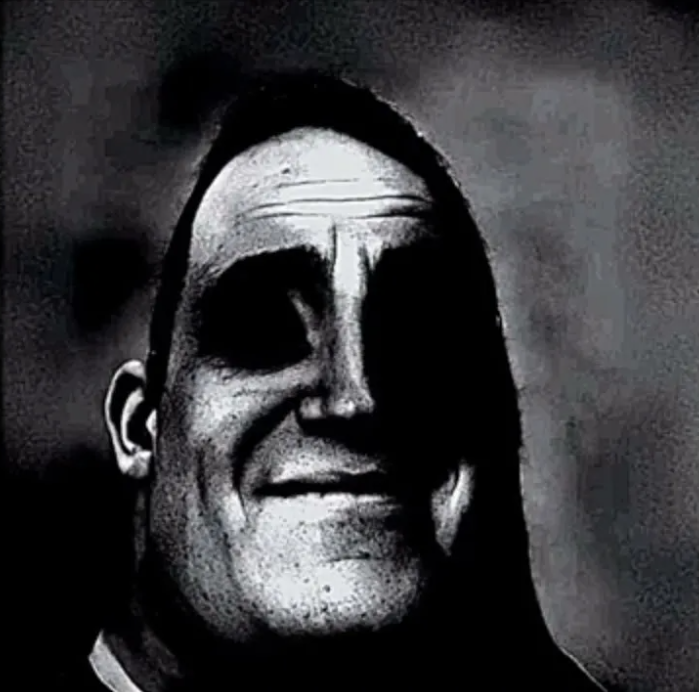

### Случайный лес

In [1629]:
from sklearn.ensemble import RandomForestRegressor

In [1630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1631]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('RMSE: ', sqrt(mean_squared_error(y_no_pred, y_no_test)))
print('R^2: ', r2_score(y_no_pred, y_no_test))

RMSE:  1.204782728768468
R^2:  0.06331407144558432


In [1652]:
params = {
    'n_estimators': range(200, 2000, 200),
    'max_depth': range(1, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_random_forest = GridSearchCV(estimator=RF, param_grid=params, n_jobs=-1, cv=5, refit=True, 
                                    scoring='neg_root_mean_squared_error')

grid_search_random_forest.fit(X, y)

In [1654]:
grid_search_random_forest.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [1655]:
best_RF = RandomForestRegressor(n_estimators=1200, max_depth=7, min_samples_leaf=4, min_samples_split=10)
best_RF.fit(X_train, y_train)
y_pred = best_RF.predict(X_test)

print('RMSE: ', sqrt(mean_squared_error(y_pred, y_test)))
print('R^2: ', r2_score(y_pred, y_test))

RMSE:  1.3033072027724177
R^2:  -0.13083926351816877


### Градиентный бустинг

In [1183]:
#!pip install catboost

In [1259]:
from catboost import CatBoostRegressor

In [1184]:
data_catboost = no_scores.copy()
y = data_catboost['Global_Sales']
X = data_catboost[num_cols+cat_cols_new+str_cols]
X_train_boost, X_valid_boost, y_train_boost, y_valid_boost = train_test_split(X, y, test_size=.2, random_state=42)

In [1187]:
boosting_model = CatBoostRegressor(cat_features=cat_cols_new, text_features=str_cols, silent=True)

boosting_model.fit(X_train_boost, y_train_boost)

print('RMSE: ', sqrt(mean_squared_error(boosting_model.predict(X_valid_boost), y_valid_boost)))
print('R^2: ', r2_score(boosting_model.predict(X_valid_boost), y_valid_boost))

RMSE:  1.1208784487715773
R^2:  0.08931820999895579


Результаты лучше, чем у линейной регрессии, однако R^2 всё-таки очень слабая ещё

Подберём оптимальные гиперпараметры

In [1204]:
params = {
    #'n_estimators': range(1380, 1420, 10),
    #'max_depth': range(3, 10),
    'learning_rate': np.linspace(0.01, 0.10, 10)
}

In [1205]:
grid_search_catboost = GridSearchCV(estimator=boosting_model, param_grid=params, n_jobs=-1, cv=5, refit=True, 
                                    scoring='neg_root_mean_squared_error')

grid_search_catboost.fit(X, y)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000016F55886A90>,
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search_catboost.best_params_

{'n_estimators': 1400, 'max_depth': 8, 'learning_rate': 0.05}

In [1208]:
best_boosting_model = CatBoostRegressor(cat_features=cat_cols_new, text_features=str_cols, silent=True,
                                       n_estimators=1400, max_depth=8, learning_rate=0.05)

best_boosting_model.fit(X_train_boost, y_train_boost)

print('RMSE: ', sqrt(mean_squared_error(best_boosting_model.predict(X_valid_boost), y_valid_boost)))
print('R^2: ', r2_score(best_boosting_model.predict(X_valid_boost), y_valid_boost))

RMSE:  0.9985274495414325
R^2:  0.40603169094380975


Результаты заметно стали лучше, особенно с R^2 метрикой